In [1]:
# Standard Library
import datetime
import os
from pathlib import Path

# Third Party Library
import joblib
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
from scipy.stats import rankdata
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture
from sklearn.preprocessing import StandardScaler

# First Party Library
from src.visualization.plot import (
    image_concat_and_imshow,
    scatter_each_classes,
)

In [6]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
markers = ['s', 'D', 'o', 'p', '*', 'h', 'D', '8', 'v', 'x']

model_name = "SimpleCAE64"
trained_datetime = "2023-01-31/12-54-00"

project_dir = Path("/home/shinsei/MyResearchs/feat_extrc")

model_save_pardir = project_dir / "models" / "VBGMM"
feature_pardir = project_dir / "reports" / "features" / model_name / trained_datetime
figure_pardir = project_dir / "reports" / "figures" / "VBGMM" / trained_datetime
image_pardir = project_dir / "data/processed/CNTForest/cnt_sem_64x64/10k/"

# feature_csv_path = "/home/shinsei/MyResearchs/feat_extrc/reports/features/SimpleCAE32/2023-07-07/12-15-24/features.csv"
feature_train_csv_path = feature_pardir / "features_train_data.csv"
feature_check_csv_path = feature_pardir / "features_check_data.csv"

In [7]:
df_train = pl.read_csv(feature_train_csv_path)
X_train = df_train.select([
    pl.exclude(["filename", "dirname"])
]).to_numpy()
df_train.head()

column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22,column_23,column_24,column_25,column_26,column_27,column_28,column_29,column_30,column_31,column_32,column_33,column_34,column_35,column_36,…,column_93,column_94,column_95,column_96,column_97,column_98,column_99,column_100,column_101,column_102,column_103,column_104,column_105,column_106,column_107,column_108,column_109,column_110,column_111,column_112,column_113,column_114,column_115,column_116,column_117,column_118,column_119,column_120,column_121,column_122,column_123,column_124,column_125,column_126,column_127,dirname,filename
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,str
0.06467,0.449845,-0.004304,0.271748,0.431135,-0.25571,0.484634,0.443439,0.208569,0.177368,-0.110743,-0.001739,0.588683,0.295808,0.4475,0.741645,0.1085,0.002758,0.23228,0.089669,0.452595,-0.06911,0.40616,-0.046445,0.2561,0.724944,0.374231,-0.133637,1.084016,-0.395082,-0.071814,-0.985289,-0.335491,-0.133136,0.478613,-0.614109,-0.050909,…,-0.267367,-0.514888,-0.415498,-0.077274,0.418692,0.077467,0.546418,0.078186,0.712743,-0.19198,-0.541418,-0.208391,-0.060966,0.926791,0.279044,0.503697,-0.034332,0.103297,0.206187,0.360987,-0.43581,0.063981,1.057308,0.023471,-0.43021,0.383196,0.033634,-0.110214,-0.526979,-0.027486,0.156107,0.410229,0.433539,0.339265,-0.849557,0,"""10k_0_h000_w00…"
-0.724657,0.297627,0.39185,0.514767,0.029934,-0.017617,0.1244,-0.154235,0.486145,-0.060323,0.097131,-0.780889,0.420275,0.04944,0.040808,-0.862848,0.635304,-0.228957,-0.554802,-0.343502,0.530686,0.389811,0.194043,0.919341,0.142359,0.307016,0.673403,0.27404,0.358887,0.507453,-0.377452,-0.580998,0.321634,0.094092,-0.156162,-0.637084,-0.406061,…,0.742645,0.474383,-0.026107,0.127253,0.103198,-0.756997,0.47671,0.019298,0.280491,-0.170466,0.12174,0.887049,0.472714,0.719757,0.297054,0.087764,-0.537493,-0.00221,-0.420547,0.485933,-0.039175,-1.146622,0.035441,0.321079,0.241562,-0.385272,0.061734,0.569077,0.427054,-0.484394,0.854778,0.419353,0.321071,0.145117,0.171447,0,"""10k_0_h000_w00…"
0.308809,-0.061796,0.158289,0.101255,-0.474088,0.039397,0.468284,0.041289,-0.410554,0.262898,-0.51035,0.292407,0.277257,0.069152,-0.770258,0.4279,0.967876,-0.300345,-0.598859,-0.434252,-0.190329,0.495413,-0.15121,0.076531,0.650698,0.839628,0.287402,-0.795734,1.198971,-0.05582,0.062132,0.24947,0.676908,-0.063564,0.830316,0.405512,0.167344,…,0.178893,0.405454,0.144323,0.128582,0.037222,-0.144406,0.186048,-0.006705,0.372453,-0.010856,0.343947,-0.399513,0.691063,-0.282431,0.245226,0.263043,-0.073345,0.433583,0.261283,-0.05125,0.332254,-0.032269,0.124297,0.374545,0.274291,0.033151,0.037487,-0.069989,0.092904,-0.35041,-0.267655,0.940049,0.415804,0.178127,-0.117325,0,"""10k_0_h000_w00…"
0.231285,-0.21314,0.342558,1.020288,-0.798412,0.553869,0.480808,-0.352934,-0.080384,0.833665,0.367789,0.110018,0.106084,-0.13585,0.090177,0.3205,-0.901021,-0.234645,0.319775,-0.596814,-0.129278,-0.277108,0.248126,0.56065,0.796158,0.198727,-0.052486,-0.880841,0.897983,-0.456001,-0.631223,0.105146,-0.664628,0.072109,-0.659576,-0.369963,-0.461423,…,0.279044,-0.031665,0.241586,0.074778,0.297313,-0.220082,0.153903,0.098606,-0.27586,0.021567,-0.516556,-0.312869,0.013905,0.021334,0.342683,0.181047,0.396866,0.281484,0.842474,0.046669,0.372425,-0.903232,-0.107877,0.077547,0.206817,-0.596667,0.079793,-0.120984,0.062299,-0.084528,-0.700964,0.191952,0.154682,0.488605,-0.310994,0,"""10k_0_h000_w00…"
0.273466,0.03551,0.260503,0.275452,-0.4625,-0.618048,0.047937,0.343218,0.376266,0.984061,0.037681,-0.491221,0.53997,0.49202,0.048629,0.130778,-0.41776,-0.017596,0.188454,0.457211,-0.236

In [8]:
df_check = pl.read_csv(feature_check_csv_path)
X_check = df_check.select([
    pl.exclude(["filename", "dirname"])
]).to_numpy()
df_check.head()

column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22,column_23,column_24,column_25,column_26,column_27,column_28,column_29,column_30,column_31,column_32,column_33,column_34,column_35,column_36,…,column_93,column_94,column_95,column_96,column_97,column_98,column_99,column_100,column_101,column_102,column_103,column_104,column_105,column_106,column_107,column_108,column_109,column_110,column_111,column_112,column_113,column_114,column_115,column_116,column_117,column_118,column_119,column_120,column_121,column_122,column_123,column_124,column_125,column_126,column_127,dirname,filename
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,str
0.065844,0.456296,-0.035367,0.26056,0.427508,-0.242585,0.483714,0.443716,0.208413,0.179884,-0.104271,0.008045,0.592295,0.309818,0.460387,0.73503,0.114262,-0.000821,0.233205,0.094839,0.451111,-0.092771,0.406754,-0.033179,0.256756,0.709791,0.363929,-0.137135,1.06708,-0.39191,-0.08032,-0.985155,-0.339981,-0.127286,0.484614,-0.60428,-0.061062,…,-0.265918,-0.51484,-0.405593,-0.060383,0.423672,0.066054,0.54277,0.06772,0.714345,-0.208089,-0.535634,-0.203764,-0.086305,0.913555,0.289121,0.493396,-0.040783,0.085768,0.201835,0.360824,-0.426644,0.05401,1.04263,0.010852,-0.443319,0.365737,0.033385,-0.098948,-0.529396,-0.037968,0.15389,0.400647,0.437345,0.345232,-0.840677,0,"""10k_0_h000_w00…"
0.274466,0.040025,0.241746,0.266495,-0.461928,-0.611168,0.046426,0.347641,0.380831,0.981607,0.044197,-0.478119,0.542701,0.503997,0.064862,0.130086,-0.414131,-0.016174,0.190524,0.461906,-0.233841,-0.150386,0.276069,0.052993,0.582201,-0.144792,-0.834521,0.333973,0.374812,0.187126,-0.667212,0.37494,0.059356,-0.612024,-0.848175,0.093469,-0.124845,…,-0.739298,-0.002728,-0.800349,0.049623,-0.074367,-0.349521,-0.358677,0.391515,0.259612,-0.197816,-0.073403,0.498645,0.434892,0.283798,-0.402812,-0.198138,0.537457,-0.496662,0.44885,-0.012125,-0.665269,0.374117,0.454667,-0.111898,-0.577371,0.309295,-0.206973,-0.673766,0.598121,-0.04085,-0.071992,0.718064,-0.450185,0.299874,0.172742,0,"""10k_0_h000_w00…"
-0.527044,0.122826,0.465156,0.342177,0.110169,-0.226744,0.106913,0.586186,-0.358525,-0.420006,0.283058,-0.035396,-0.552352,-0.05543,0.28247,-0.229312,0.281848,-0.305495,0.260872,0.755103,-0.400128,-0.041696,-0.301814,-0.471341,0.071527,0.329298,-0.359025,-0.564077,-0.100355,-0.004737,-0.571725,0.467298,0.094067,-0.647437,-0.410426,0.100571,1.143898,…,0.383931,0.733171,-0.180684,-0.240306,-0.41048,0.448323,-0.445665,-0.30479,-0.757827,0.306828,-0.279555,0.734831,0.027825,0.159764,-0.45911,0.218875,-0.456557,-0.325514,-0.344042,0.029993,0.274603,0.486305,0.000801,-0.7404,0.243284,-0.484801,-0.033523,0.00592,0.417204,0.522985,0.448483,-0.863211,0.166636,0.55941,0.350363,0,"""10k_0_h000_w01…"
0.30895,0.093033,-0.20141,0.149488,0.066944,0.414872,0.57505,0.52346,-0.489577,0.0987,-0.42191,0.015667,-0.119155,0.491217,0.140075,0.160595,0.445018,0.103138,-0.095053,-0.804952,0.181403,-0.117582,-0.174914,0.145455,-0.508557,0.345528,0.054694,0.512174,0.727014,-0.707067,0.284327,0.620765,-0.264744,0.126628,0.693925,0.091242,-0.274236,…,-0.40928,0.264461,0.348189,0.379293,0.10037,-0.277411,0.587225,0.927403,-0.584652,0.616095,-0.528031,0.205001,-0.389817,-0.651928,-0.210273,0.421597,-0.005664,-0.089925,0.841791,0.188486,-0.290556,0.17324,0.09112,0.399453,0.465761,0.643663,0.000064,0.149591,0.520261,-0.037599,-0.429455,0.297161,-0.147974,0.761004,0.09391,0,"""10k_0_h000_w01…"
0.695654,0.507147,0.371764,0.495316,-0.293124,0.814723,0.2953,0.653809,0.295182,-0.800734,-0.045925,-0.821087,0.375412,0.725591,0.26009,-0.449351,0.412782,0.0602,-0.046277

In [9]:
sc = StandardScaler()
pca = PCA()

X_train_std = sc.fit_transform(X_train)
X_train_pca = pca.fit_transform(X_train_std)

X_check_std = sc.transform(X_check)
X_check_pca = pca.transform(X_check_std)

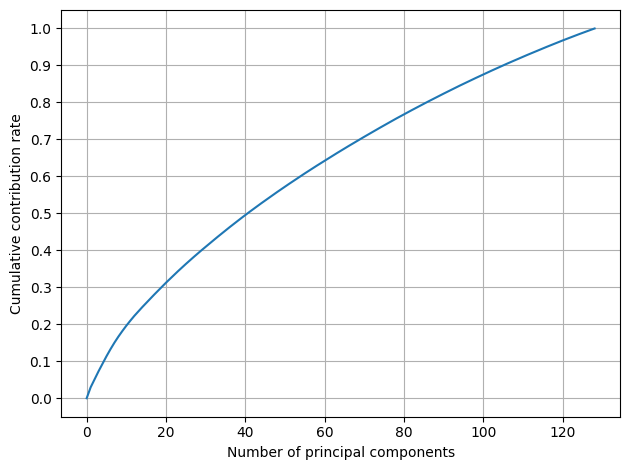

In [14]:
cumsum_contrb_rate = pca.explained_variance_ratio_.cumsum()
num_use_features = cumsum_contrb_rate[cumsum_contrb_rate < 0.5].shape[0]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(range(X_train.shape[1]+1), [0]+list(cumsum_contrb_rate))
ax.set_xlabel('Number of principal components')
ax.set_ylabel('Cumulative contribution rate')
ax.set_yticks(np.arange(0., 1.1, 0.1))
ax.grid()
fig.tight_layout()
plt.show()

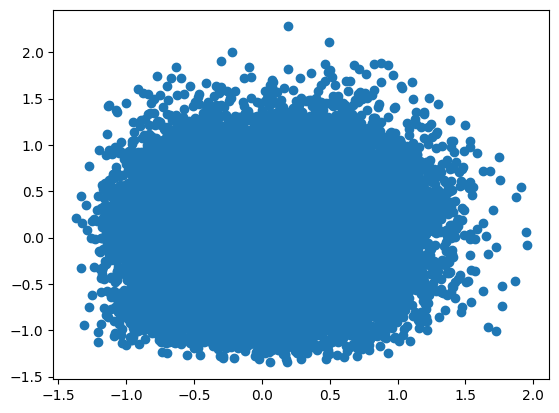

In [11]:
component_01 = df_train.select([pl.col("column_0"), pl.col("column_1")]).to_numpy()
plt.scatter(component_01[:, 0], component_01[:, 1])

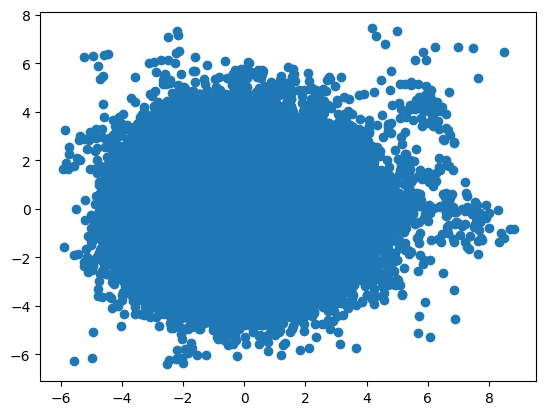

In [13]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])

In [15]:
model_save_dir = model_save_pardir / trained_datetime
model_save_dir

PosixPath('/home/shinsei/MyResearchs/feat_extrc/models/VBGMM/2023-01-31/12-54-00')

vbgmm_pca_40_10clusters
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
  Iteration 80
  Iteration 90
  Iteration 100
  Iteration 110
  Iteration 120
  Iteration 130
  Iteration 140
  Iteration 150
  Iteration 160
  Iteration 170
  Iteration 180
  Iteration 190
  Iteration 200
  Iteration 210
  Iteration 220
  Iteration 230
  Iteration 240
  Iteration 250
  Iteration 260
  Iteration 270
  Iteration 280
  Iteration 290
  Iteration 300
  Iteration 310
  Iteration 320
Initialization converged: True
Initialization 1
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
  Iteration 80
  Iteration 90
  Iteration 100
  Iteration 110
  Iteration 120
  Iteration 130
  Iteration 140
  Iteration 150
  Iteration 160
  Iteration 170
  Iteration 180
  Iteration 190
  Iteration 200
  Iteration 210
  Iteration 220
  Iteration 230
Initialization converged: True
Initialization 2
 

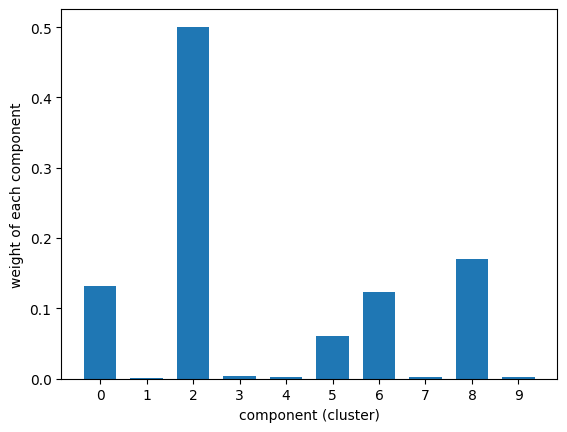

In [16]:
dt = datetime.datetime.now()
nc = 10
max_iter = 500

clustering_type = f'vbgmm_pca_{num_use_features}_{nc}clusters'
print(clustering_type)

vbgmm_train_pca = BayesianGaussianMixture(
    n_components=nc,
    max_iter=500,
    n_init=10,
    init_params="k-means++",
    verbose=1
)
y_train_pca = vbgmm_train_pca.fit_predict(X_train_pca[:,:num_use_features])

# vbgmm_train_pca: BayesianGaussianMixture = joblib.load("/workdir/notebooks/vbgmm_train_pca.pkl")
# y_train_pca = vbgmm_train_pca.predict(X_train_pca[:,:num_use_features])

model_save_dir = model_save_pardir / trained_datetime

if not model_save_dir.exists():
    os.makedirs(model_save_dir)
joblib.dump(vbgmm_train_pca, model_save_dir / f"{clustering_type}_iter{max_iter}.pkl")

rank_of_cluster_train_pca = rankdata(np.histogram(y_train_pca, bins=nc, range=(0, nc))[0], method='ordinal')
y_train_pca_sorted_cluster = rank_of_cluster_train_pca[y_train_pca]


# plt.subplot(4, 1, 4)
x_tick = np.arange(0, nc)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.bar(x_tick, vbgmm_train_pca.weights_, width=0.7, tick_label=x_tick)
plt.xlabel('component (cluster)')
plt.ylabel('weight of each component')
plt.show()

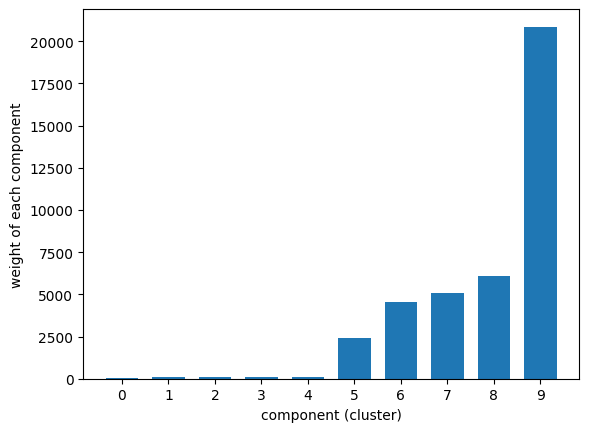

In [18]:
hist, bin_edges = np.histogram(y_train_pca_sorted_cluster)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.bar(x_tick, hist, width=0.7, tick_label=x_tick)
plt.xlabel('component (cluster)')
plt.ylabel('weight of each component')
plt.show()

In [19]:
feature_pardir

PosixPath('/home/shinsei/MyResearchs/feat_extrc/reports/features/SimpleCAE64/2023-01-31/12-54-00')

In [20]:
make_file_path_col = pl.concat_str([pl.col("dirname"), pl.col("filename")], separator="/").alias("filepath")
df_train_clustering = df_train.with_columns(
    [make_file_path_col, pl.Series("cluster", y_train_pca_sorted_cluster-1)]
)
df_train_clustering.write_csv(feature_pardir / f"feature_train_data_clustering_VBGMM_iter{max_iter}.csv")

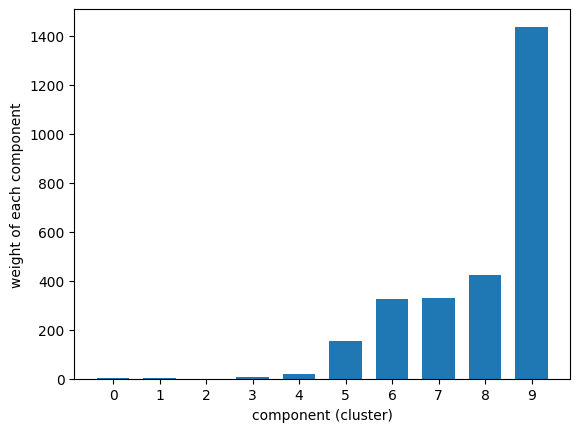

In [21]:
y_check_pca = vbgmm_train_pca.predict(X_check_pca[:, :num_use_features])
y_check_pca_sorted_cluster = rank_of_cluster_train_pca[y_check_pca]

hist, bin_edges = np.histogram(y_check_pca_sorted_cluster)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.bar(x_tick, hist, width=0.7, tick_label=x_tick)
plt.xlabel('component (cluster)')
plt.ylabel('weight of each component')
plt.show()

In [22]:
make_file_path_col = pl.concat_str([pl.col("dirname"), pl.col("filename")], separator="/").alias("filepath")
df_check_clustering = df_check.with_columns(
    [make_file_path_col, pl.Series("cluster", y_check_pca_sorted_cluster-1)]
)
df_check_clustering.write_csv(feature_pardir / f"feature_check_data_clustering_VBGMM_iter{max_iter}.csv")

In [23]:
figure_pardir

PosixPath('/home/shinsei/MyResearchs/feat_extrc/reports/figures/VBGMM/2023-01-31/12-54-00')

['s', 'D', 'o', 'p', '*', 'h', 'D', '8', 'v', 'x']
max_abs_range=9.744593094178965


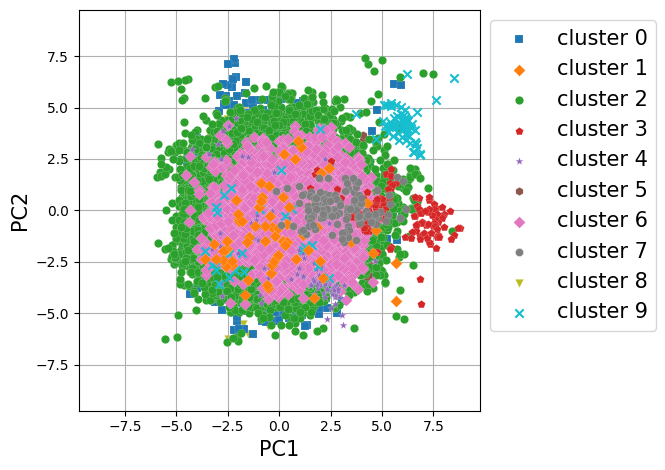

In [31]:
# df_train_clustering = pl.read_csv("/home/shinsei/MyResearchs/feat_extrc/reports/features/SimpleCAE32/2023-07-10/13-09-32/feature_train_data_clustering.csv")
# # scatter_data = df_train_clustering.select([pl.exclude(["dirname", "filename", "filepath", "cluster"])]).to_numpy()
# cluster_labels = df_train_clustering.select(pl.col("cluster")).to_numpy().flatten()
if not (figure_pardir / f"cluster_images_iter{max_iter}").exists():
    os.makedirs(figure_pardir / f"cluster_images_iter{max_iter}")

scatter_each_classes(
    X_train_pca, 
    # cluster_labels, 
    # y_train_pca_sorted_cluster-1,
    y_train_pca,
    rank_of_cluster_train_pca[::-1],
    markers,
    colors,
    xylabel=("PC1", "PC2"),
    face_color="None",
    fontsize=15,
    # path="../reports/figures/VBGMM/2023-07-14/cluster_images/scatter.png"
    # path = figure_pardir / f"cluster_images_iter{max_iter}" / f"scatter_iter{max_iter}.png"
)

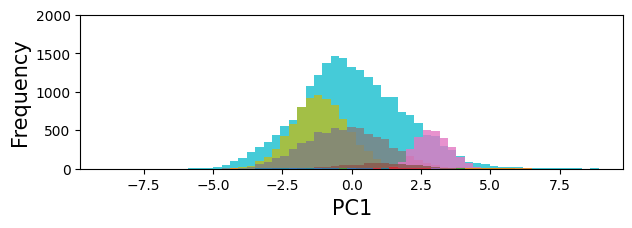

In [59]:
x_min = -9.786490229491115
x_max = 9.786490229491115
fontsize = 15

df_pc1 = pl.DataFrame(X_train_pca[:,0]).with_columns(
    df_train_clustering.select([pl.col("cluster")])
)

min_max = df_pc1.select(
    pl.col("column_0")
).describe().filter(
    (pl.col("describe") == "max" ) | 
    (pl.col("describe") == "min" ) 
).select(
    pl.col("column_0")
).to_numpy().flatten()

fig = plt.figure(figsize=(7,2))
ax = fig.add_subplot(1,1,1)

for i in range(10):
    pc1 = df_pc1.filter(
        pl.col("cluster") == i
    ).select("column_0").to_numpy().flatten()
    
    ax.hist(pc1, bins=50, range=min_max, alpha=0.8, label=f"cluster_{i}", zorder=10-i)
ax.set_xlim(x_min, x_max)
ax.set_ylim(0, 2000)

ax.set_xlabel("PC1", fontsize=fontsize)
ax.set_ylabel("Frequency", fontsize=fontsize)
fig.savefig(
    fname=figure_pardir / f"cluster_images_iter{max_iter}" / "frequency_pc1.png",
    dpi=fig.get_dpi(),
    bbox_inches="tight"
)

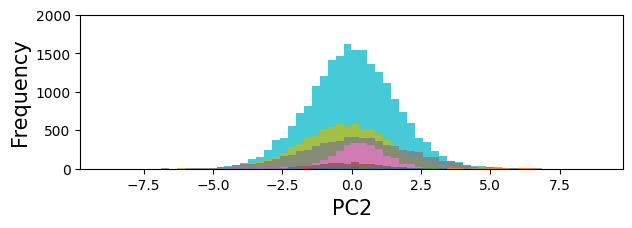

In [60]:
df_pc2 = pl.DataFrame(X_train_pca[:,1]).with_columns(
    df_train_clustering.select([pl.col("cluster")])
)

min_max = df_pc2.select(
    pl.col("column_0")
).describe().filter(
    (pl.col("describe") == "max" ) | 
    (pl.col("describe") == "min" ) 
).select(
    pl.col("column_0")
).to_numpy().flatten()

fig = plt.figure(figsize=(7,2))
ax = fig.add_subplot(1,1,1)

for i in range(10):
    pc1 = df_pc2.filter(
        pl.col("cluster") == i
    ).select("column_0").to_numpy().flatten()
    
    ax.hist(pc1, bins=50, range=min_max, alpha=0.8, label=f"cluster_{i}", zorder=10-i)
ax.set_xlim(x_min, x_max)
ax.set_ylim(0, 2000)

ax.set_xlabel("PC2", fontsize=fontsize)
ax.set_ylabel("Frequency", fontsize=fontsize)

fig.savefig(
    fname=figure_pardir / f"cluster_images_iter{max_iter}" / "frequency_pc2.png",
    dpi=fig.get_dpi(),
    bbox_inches="tight"
)

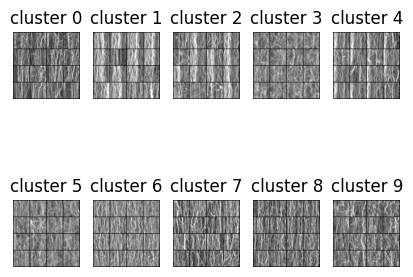

In [63]:
concatenated_images = image_concat_and_imshow(df_train_clustering, labels=np.arange(0,10), colrow=(4,4), image_root=image_pardir)
for i, img in enumerate(concatenated_images):
    img.save(figure_pardir / f"cluster_images_iter{max_iter}" / "4x4" / f"cluster{i}.png")

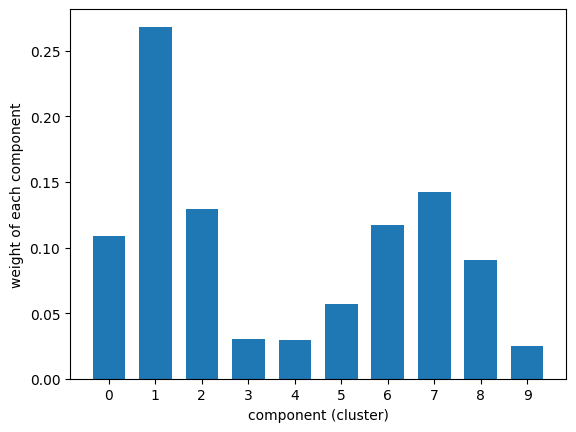

In [13]:
dt = datetime.datetime.now()

nc = 10

clustering_type = f'vbgmm_std_10_{nc}clusters'
print(clustering_type)

vbgmm_train_std_128_10 = BayesianGaussianMixture(
    n_components=nc,
    max_iter=1000,
    n_init=10,
    init_params="k-means++"
)
y_train_std = vbgmm_train_std_128_10.fit_predict(X_train_std)

model_save_dir = model_save_pardir / dt.strftime("%Y-%m-%d/%H-%M-%S")
if not model_save_dir.exists():
    os.makedirs(model_save_dir)
joblib.dump(vbgmm_train_std_128_10, model_save_dir / "vbgmm_train_std_128_10.pkl")

rank_of_cluster_train_std = rankdata(- vbgmm_train_std_128_10.weights_, method='ordinal')
y_train_std_sorted_cluster = rank_of_cluster_train_std[y_train_std]

# plt.subplot(4, 1, 4)
x_tick = np.arange(0, nc)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.bar(x_tick, vbgmm_train_std_128_10.weights_, width=0.7, tick_label=x_tick)
plt.xlabel('component (cluster)')
plt.ylabel('weight of each component')
plt.show()

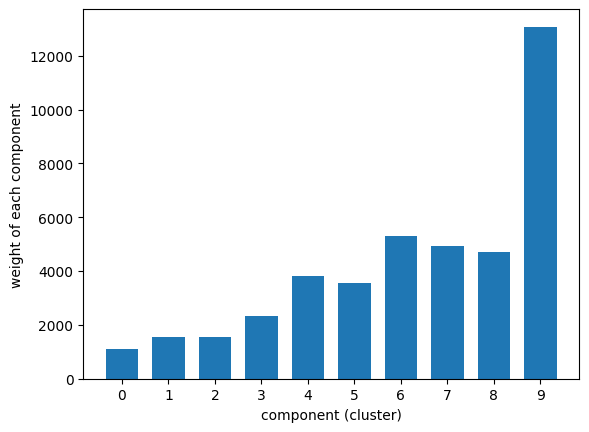

In [15]:
hist, bin_edges = np.histogram(y_train_std_sorted_cluster)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.bar(x_tick, hist, width=0.7, tick_label=x_tick)
plt.xlabel('component (cluster)')
plt.ylabel('weight of each component')
plt.show()

In [16]:
y_train_std = vbgmm_train_std_128_10.predict(X_train_std)
y_check_std = vbgmm_train_std_128_10.predict(X_check_std)

rank_of_cluster_train_std = rankdata(np.histogram(y_train_std)[0], method='ordinal')
y_train_std_sorted_cluster = rank_of_cluster_train_std[y_train_std]
y_check_std_sorted_cluster = rank_of_cluster_train_std[y_check_std]

['s', 'D', 'o', 'p', '*', 'h', 'D', '8', 'v', 'x']
max_abs_range=8.552229006934562


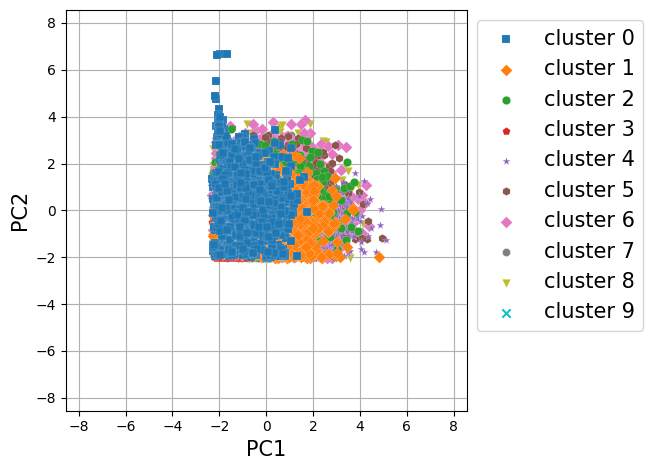

In [28]:
scatter_each_classes(
    X_train_std, 
    # cluster_labels, 
    y_train_std_sorted_cluster-1,
    np.arange(0, 10)[::-1],
    markers,
    colors,
    xylabel=("PC1", "PC2"),
    face_color="None",
    fontsize=15,
    path="../reports/figures/VBGMM/2023-07-50/cluster_images/scatter.png"
)

In [19]:
feature_pardir

PosixPath('/home/shinsei/MyResearchs/feat_extrc/reports/features/SimpleCVAE_softplus32/2023-07-18/19-08-34')

In [20]:
make_file_path_col = pl.concat_str([pl.col("dirname"), pl.col("filename")], separator="/").alias("filepath")
df_check_clustering = df_check.with_columns(
    [make_file_path_col, pl.Series("cluster", y_check_std_sorted_cluster-1)]
)
df_check_clustering.write_csv(feature_pardir / "feature_check_data_clustering.csv")
df_check_clustering.head()

column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,dirname,filename,filepath,cluster
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,i64
0.371207,0.773912,0.321,0.97179,0.467441,-0.794627,0.155872,-0.429781,-0.62078,0.092581,0,"""10k_0_h000_w00…","""0/10k_0_h000_w…",9
-0.466664,0.800218,0.09891,-0.229312,0.719136,-0.84856,1.146627,0.535144,0.163504,-0.539297,0,"""10k_0_h000_w00…","""0/10k_0_h000_w…",7
0.139828,-0.057409,-0.205014,-0.360194,0.178539,-0.288145,0.027653,-0.986673,-0.295563,-0.346313,0,"""10k_0_h000_w00…","""0/10k_0_h000_w…",9
0.108137,0.61107,-0.408147,0.128743,0.614519,-1.381092,-0.371074,0.507027,0.002102,0.196136,0,"""10k_0_h000_w00…","""0/10k_0_h000_w…",7
0.846178,-0.870254,-0.509567,0.478472,-0.679784,0.488236,-0.023896,0.480033,0.004727,-1.526124,0,"""10k_0_h000_w01…","""0/10k_0_h000_w…",9


In [21]:
make_file_path_col = pl.concat_str([pl.col("dirname"), pl.col("filename")], separator="/").alias("filepath")
df_train_clustering = df_train.with_columns(
    [make_file_path_col, pl.Series("cluster", y_train_std_sorted_cluster-1)]
)
df_train_clustering.write_csv(feature_pardir / "feature_train_data_clustering.csv")
df_train_clustering.head()

column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,dirname,filename,filepath,cluster
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,i64
0.38649,0.75855,0.388386,1.012816,0.467618,-0.800058,0.161129,-0.432032,-0.632134,0.08859,0,"""10k_0_h000_w00…","""0/10k_0_h000_w…",9
-0.193307,0.355739,0.189834,-0.427002,-0.923228,-1.006827,0.641109,-0.609367,0.176206,-0.414809,0,"""10k_0_h000_w00…","""0/10k_0_h000_w…",9
-0.460056,0.780828,0.160261,-0.182374,0.721669,-0.856519,1.162508,0.54174,0.159463,-0.551491,0,"""10k_0_h000_w00…","""0/10k_0_h000_w…",7
0.16748,0.247725,-0.5245,-0.092569,0.035326,-0.131247,1.267444,-0.21511,-0.503101,-0.181691,0,"""10k_0_h000_w00…","""0/10k_0_h000_w…",7
0.149339,-0.07854,-0.121354,-0.315032,0.185015,-0.295195,0.033236,-0.989271,-0.296639,-0.360667,0,"""10k_0_h000_w00…","""0/10k_0_h000_w…",9


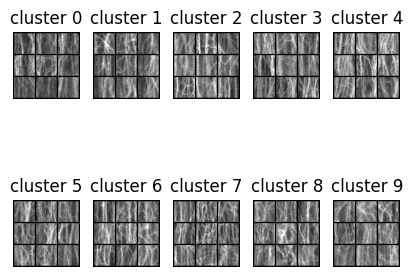

In [25]:
concatenated_images = image_concat_and_imshow(df_train_clustering, labels=np.arange(0,10), colrow=(3,3), image_root=image_pardir)
for i, img in enumerate(concatenated_images):
    img.save(f"/home/shinsei/MyResearchs/feat_extrc/reports/figures/VBGMM/2023-07-18/cluster_images/3x3/cluster{i}.png")